Text(0.5, 1.0, 'Label 8')

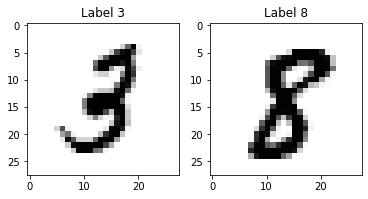

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
 
# Load the MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
 
# Randomly select 1000 samples for performance reasons
np.random.seed(100)
subsample_idc = np.random.choice(X.shape[0], 1000, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]
 
# Show two example images
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[11,:].reshape(28,28), 'Greys')
ax[1].imshow(X[15,:].reshape(28,28), 'Greys')
ax[0].set_title("Label 3")
ax[1].set_title("Label 8")

In [2]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
X.shape

(1000, 784)

/Users/Yi/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/Yi/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


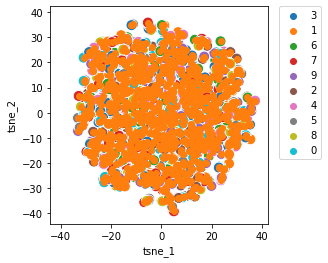

,tsne_1,tsne_2,label
0,-26.362310,-16.151266,3
1,-27.744371,24.513809,1
2,-3.962407,2.695131,6
3,-23.806225,-13.468306,7
4,1.924505,-11.432107,9
...,...,...,...
995,-19.503876,22.707193,3
996,-16.812883,-9.083031,7
997,-9.678022,26.194973,0
998,2.838607,-34.416145,6


In [16]:

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# # Plot the result of our TSNE with the label color coded
# # A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.scatter(tsne_result[:,0], tsne_result[:,1], cmap=plt.get_cmap()) 
plt.show()
tsne_result_df


/Users/Yi/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/Yi/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


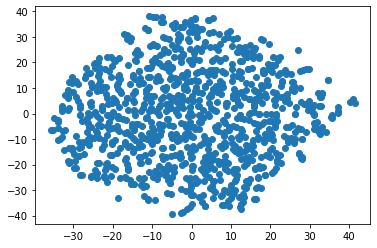

In [21]:

def tSNE_vis(data):
    """
    Produce a t-SNE 2D dimensional clustering result.
    Args:
        data (RDD): a RDD of (centroid, (point, 1))
    Returns:
        None
    """
    embedded = TSNE(n_components=2).fit_transform(data)
    x = embedded[:, 0]
    y = embedded[:, 1]
    plt.scatter(x, y, cmap=plt.cm.get_cmap("jet", 10))
    plt.show()
    
X = np.random.rand(1000,10)
tSNE_vis(X)

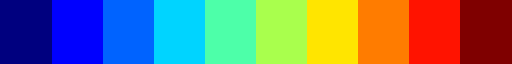

In [17]:
plt.get_cmap("jet", 10)